# Fake data simulation

In the labs we discuss using "fake" data to help verify a model. The examples were quite simple and it may be difficult to understand the usefulness of such a method. In this note, we work through a slightly more complicated example, with data taken from lab 8. 

We identify weaknesses of our linear regression model by generating/simulating data in the way that mimics how we think the actual data was created (what statisticians call "the Data Generative Process.") We then compare the simulated data and underlying model with the estimated linear regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns

#For configuring plotting 

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)

We import data on solar power systems in californa from Lab 8: 

In [5]:
pv = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/pv_csi_new.csv", index_col=0)
pv["date"] = pd.to_datetime(pv.date, format="%Y-%m-%d")
pv = pv.sort_values("date")



As a reminder, here is a plot of the cost per kilowatt variable over time

(0.0, 20000.0)

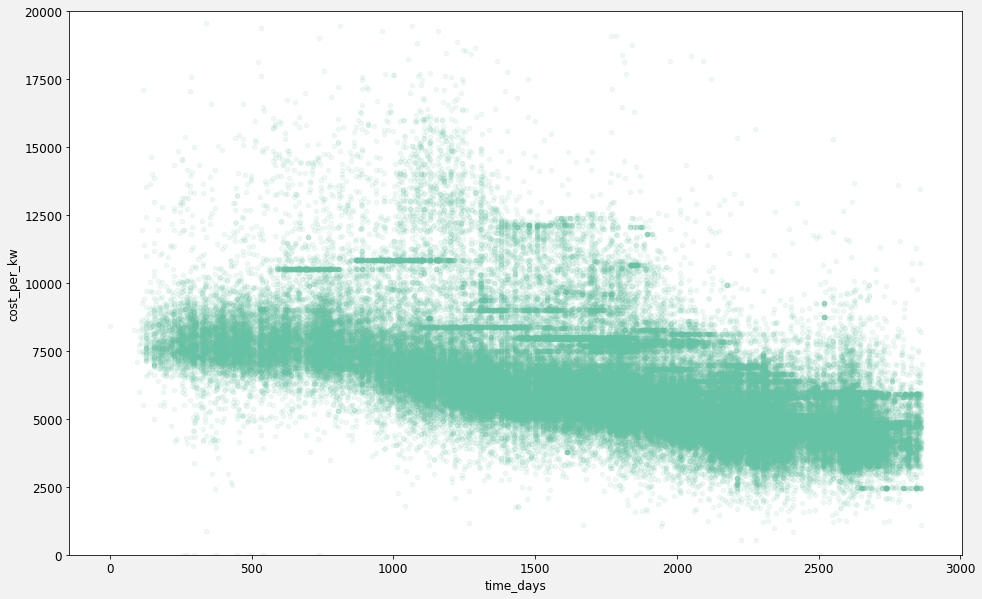

In [6]:
fig, ax = plt.subplots()
pv.plot.scatter("time_days", "cost_per_kw",alpha=.1, ax=ax)
ax.set_ylim(0,20000)

In [7]:
pv.columns

Index(['manufacturer', 'csi_id', 'csi_complete', 'prog_administrator',
       'program', 'csi_cost', 'incentive_design', 'nameplate',
       'incentive_type', 'sector', 'csi_rating', 'cec_ptc_rating',
       'incentive_step', 'incentive_amount', 'incentive_app_status', 'MASH_1A',
       'MASH_1B', 'MASH_2', 'contractor', 'contractor_id', 'csi_3rd_party',
       'city', 'county', 'state', 'zip', 'month', 'year', 'cost_per_kw',
       'year_totals', 'manuf_year_total', 'manuf_market_share',
       'contractor_year_total', 'contractor_market_share', 'county_year_total',
       'lease', 'cost_ex_subsid_per_kw', 'date', 'time_days', 'time_years',
       'time_days_sq', 'time_days_cu', 'time_years_sq', 'time_years_cu',
       'year_num_total', 'manuf_count', 'nationality', 'china'],
      dtype='object')

Here we have a simple regression model with a quadratic time trend and a binary explanatory variable for whether panels were produced in China. 

In [8]:
pvmod = smf.ols("cost_per_kw~time_days + time_days_sq + china", data=pv).fit()
pvmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 1.801e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:35:53   Log-Likelihood:            -9.2747e+05
No. Observations:              104992   AIC:                         1.855e+06
Df Residuals:                  104988   BIC:                         1.855e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8827.1591     29.357    300.680      0.000    8769.619    8884.699
time_days       -0.8789      0.038    -23.084      0.000      -0.953      -0.804
time_days_sq    -0.0003   1.15e-05    -23.028      0.000      -0.000      -0.000
china         -293.5627     12.490    -23.503      0.000    -318.043    -269.082
==============================================================================
Omnibus:                   164147.706   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        616877538.061
Skew:                           9.257   Prob(JB):                         0.00
Kurtosis:                     378.058   Cond. No.                     2.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

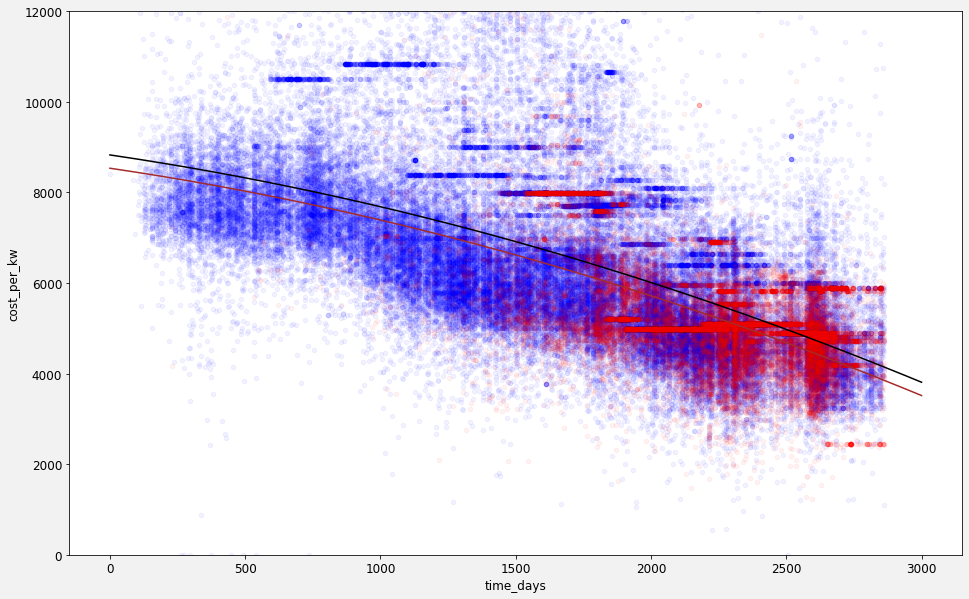

In [10]:
T=3000
x_line = np.linspace(0 , T, T)
x_line_sq = x_line**2
y_line = pvmod.params[0] + pvmod.params[1]*x_line + pvmod.params[2]*x_line_sq
y_line_china = pvmod.params[0] + pvmod.params[1]*x_line + pvmod.params[2]*x_line_sq + pvmod.params[3]



fig, ax = plt.subplots()
pv.loc[pv.china==0].plot.scatter("time_days", "cost_per_kw", alpha=.05, color="blue", ax=ax)
pv.loc[pv.china==1].plot.scatter("time_days", "cost_per_kw", alpha=.05, color="red", ax=ax)
ax.set_ylim(0,12000)
ax.plot(x_line, y_line, color="black")
ax.plot(x_line, y_line_china, color="brown")

In [11]:
pv.year

52118     2007
56909     2007
3148      2007
71616     2007
70882     2007
          ... 
17173     2014
104405    2014
69351     2014
7187      2014
91210     2014
Name: year, Length: 106551, dtype: int64

I can also show a histogram of our y-variable

(0.0, 25000.0)

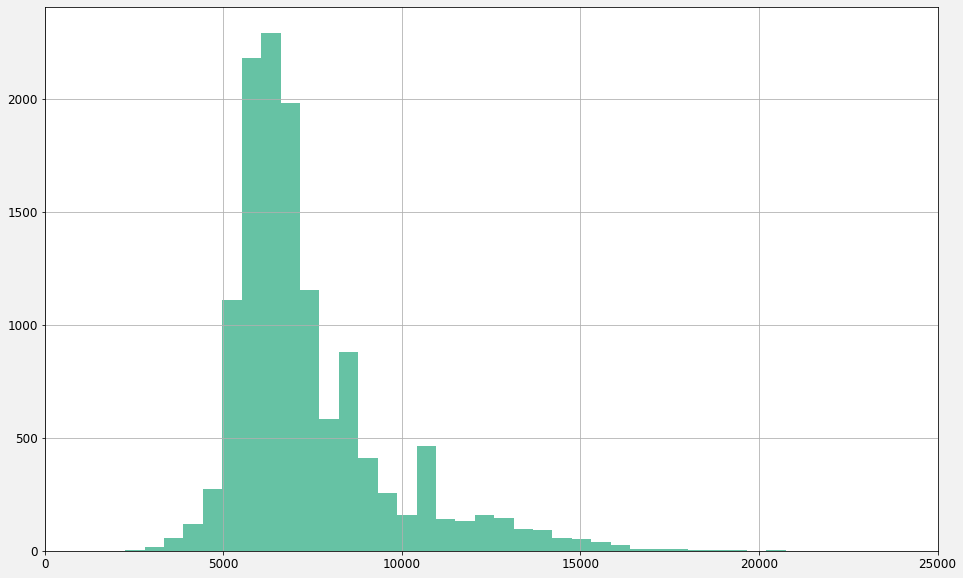

In [13]:
fig, ax = plt.subplots()
pv.loc[pv.year==2010,"cost_per_kw"].hist(bins=150, ax=ax)
ax.set_xlim(0,25000)

Now I want to investigate further the properties of my regression model. 

If I consider the process behind a reduction in costs, I might think of it as something related to the growth curve of a technology. As solar panels become more popular, prices drop as scale increases. But this process does not continue continually, but instead once there reaches a certain level of saturation, costs flatten out. 

For constrained growth problems, a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) is often used to model everything from the growth of biological stock (like fish) to the spread of new technology. 

We consider an additive inverse of the logistic function (So we go from high to low, instead of low to high) to model an underlying process for costs. In this way, I model a starting point with high costs, then a transition period with falling costs, followed by a flattening out of the costs. 

Below I choose parameters to try to get a logistic cost function of approximately the same scale as our actual data. 

B: A floor value where
L: starting high value above the floor value B
T: The number of periods (we can think about this as days)
t0: midpoint of transition area
k: Continuous growth rate (interpreted at midpoint)




In [15]:
T = 3000
ts = np.linspace(0,T, T)
L = 1000
B = 400
k = .002
t0 = ts.mean()
costFunc =L - L/(1 + np.exp(-k*(ts-t0))) + B


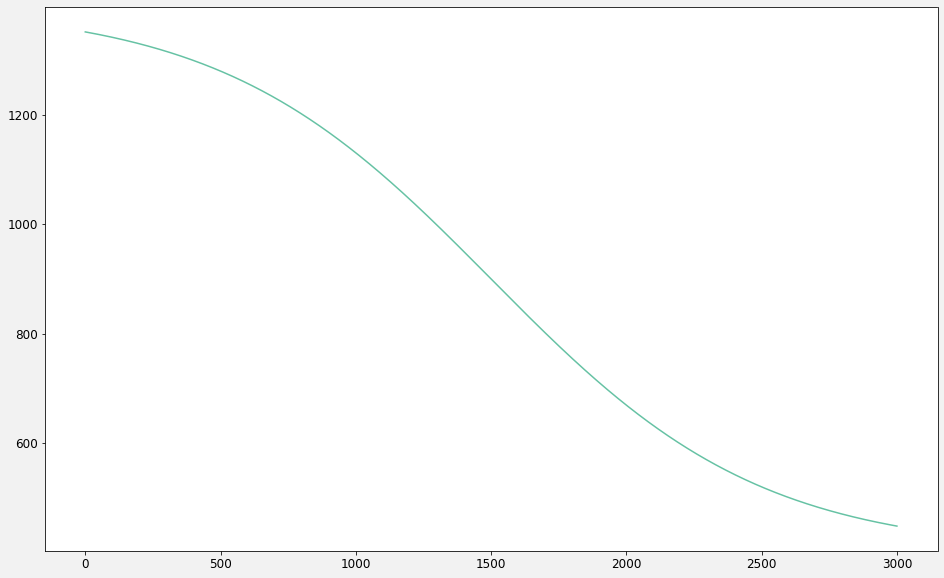

In [16]:
fig, ax = plt.subplots()
ax.plot(ts, costFunc)

Based on this cost function, we can introduce an effect for Chinese panels (reducing costs by 10%), and then adding random normal errors. 

In [17]:
costFuncChina = costFunc -.10*costFunc
china = np.random.randint(0,2, size=T)
costData = costFunc - .10*costFunc*china + np.random.normal(0,100,T)

fakeDF = pd.DataFrame({"costData":costData,"time":ts, "china":china, "costFunc":costFunc, "costFuncChina":costFuncChina})

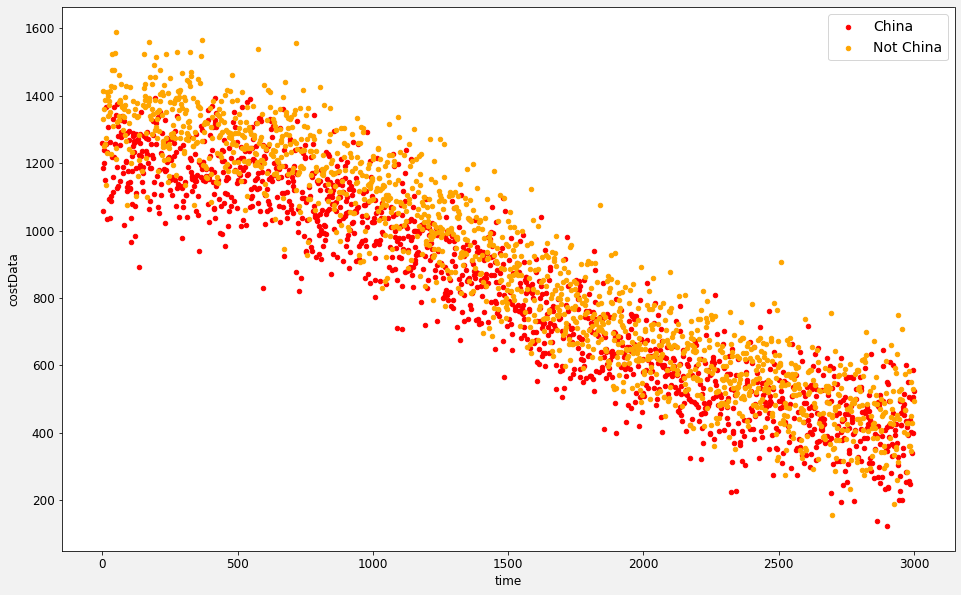

In [18]:

fig, ax = plt.subplots()
fakeDF.loc[fakeDF.china==1, :].plot.scatter("time", "costData", ax=ax, color="red", label="China")
fakeDF.loc[fakeDF.china==0, :].plot.scatter("time", "costData", ax=ax, color="Orange", label="Not China")
ax.legend()


Now we apply or our regression model to our data

In [19]:
fakeDF["time_sq"] = fakeDF.time**2
regmod1 = smf.ols("costData~time + time_sq + china", data=fakeDF).fit()
regmod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               costData   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     7633.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:39:19   Log-Likelihood:                -18312.
No. Observations:                3000   AIC:                         3.663e+04
Df Residuals:                    2996   BIC:                         3.666e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1414.3821      6.308    224.237      0.000    1402.015    1426.750
time          -0.3456      0.009    -37.812      0.000      -0.363      -0.328
time_sq     6.952e-07   2.95e-06      0.236      0.814   -5.09e-06    6.48e-06
china        -82.4469      3.960    -20.818      0.000     -90.212     -74.682
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.282
Skew:                           0.051   Prob(JB):                        0.527
Kurtosis:                       3.001   Cond. No.                     1.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
fakeDF["y_fitted_china"] = regmod1.params[0] + regmod1.params[1]*fakeDF.time + regmod1.params[2]*fakeDF.time_sq + regmod1.params[3]
fakeDF["y_fitted_notChina"] = regmod1.params[0] + regmod1.params[1]*fakeDF.time + regmod1.params[2]*fakeDF.time_sq

We can now plot the simulated data and underlying cost function against the estimated model. 

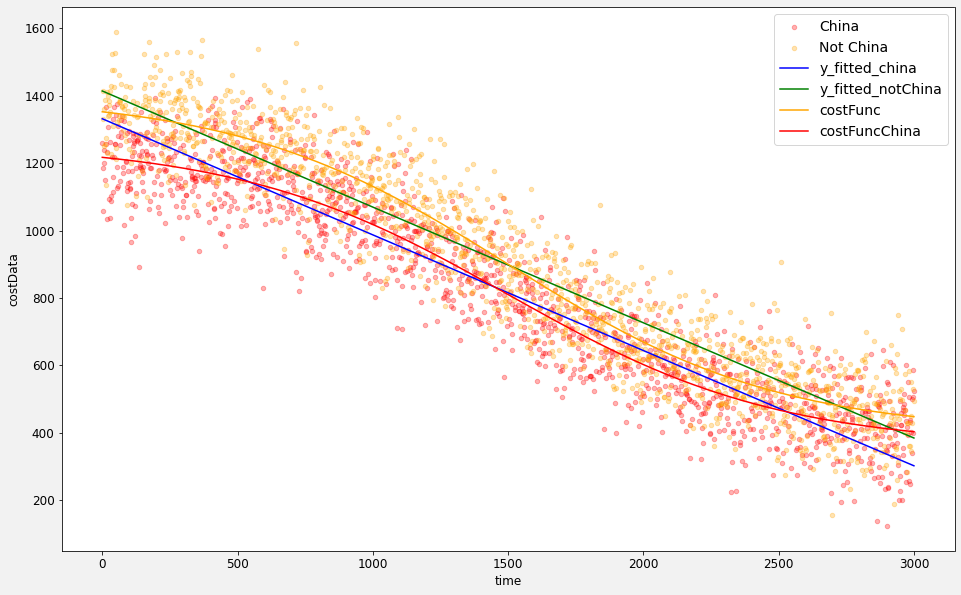

In [21]:
fig, ax = plt.subplots()
fakeDF.loc[fakeDF.china==1, :].plot.scatter("time", "costData", ax=ax, color="red", label="China", alpha=.3)
fakeDF.loc[fakeDF.china==0, :].plot.scatter("time", "costData", ax=ax, color="Orange", label="Not China", alpha=.3)
fakeDF.plot("time", "y_fitted_china", color="blue", ax=ax)
fakeDF.plot("time", "y_fitted_notChina", color="green", ax=ax)
fakeDF.plot("time", "costFunc", color="orange", ax=ax)
fakeDF.plot("time", "costFuncChina", color="red", ax=ax)

ax.legend()

A few things we can take away from this exercise: 

- For the range of the data, the linear model with a quadratic trend does an ok job of matching the data. 
- The slopes of the estimated model and the "actual" cost function are similar at the midpoints of the data
- But the estimated model and the actual generative process begin to diverge at the end points. If we were to make predictions out-of-sample (into the future), as well as extend the "real" cost function we would start to see a large divergence. 